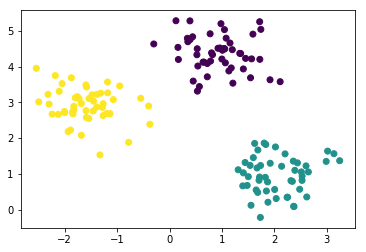

In [462]:
# 伍阳 320180941841
# 数据生成
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

plt.scatter(X[:,0],X[:,1],c=y)   
plt.show()

In [575]:
# my_kmeans
def random_point(datasets, k):
    # k个随机点
        n = datasets.shape[1] 
        centroids = np.zeros((k,n))
        i = 0
        for _ in np.random.choice(range(len(X)), k, replace=False):
            centroids[i:i+1,:] = datasets[_:(_+1),:]
            i = i + 1
        return centroids

def my_kmeans(datasets, k):
    m = np.shape(datasets)[0] # 样本数
    clusterAssment = np.zeros((m,2)) # m*2的矩阵                   
    centroids = random_point(datasets, k) # 初始化k个中心
    IsChange = True     # 聚类是否变化标记
    while IsChange:      
        IsChange = False
        for i in range(m):
            minDist = np.inf
            minIndex = -1
            
            for j in range(k): 
                distJI = np.linalg.norm(centroids[j,:] - datasets[i,:]) #欧式距离
            
                if distJI < minDist:
                    minDist = distJI; minIndex = j

            if clusterAssment[i,0] != minIndex: 
                IsChange = True
                
            clusterAssment[i,:] = minIndex, minDist**2 # 第一例是所属部分的编号，第2列为到质心的距离
        
        for cent in range(k): #更改中心点位置
            ptsInClust = datasets[np.nonzero(clusterAssment[:,0]==cent)[0]]
            centroids[cent,:] = np.mean(ptsInClust, axis=0) 
    return centroids, clusterAssment

[[-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]
 [ 0.9329651   4.35420712]]


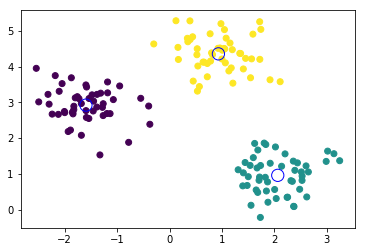

In [577]:
#执行:
centroids , ans = my_kmeans(X, 3)

plt.scatter(X[:,0],X[:,1],c=ans[:,0])  

print(centroids)

for _ in centroids: #标出中心点
    plt.scatter(_[0], _[1], color='', marker='o', edgecolors='b', s=150)